# 데이터 로딩하기

**1. 데이터베이스에서 설문조사 결과를 읽어옵니다. 그 다음 사용자와 질문을 기준으로 정렬하겠습니다.**

설문조사 결과를 분석하여, DS School 홈페이지에 접속하는 사람들이 왜 데이터 사이언스에 관심이 있는지 파악하려고 합니다. 고객들의 니즈를 파악하여 향후 어떤 강의를 우선적으로 오픈할지 결정할 수도 있고, 수강생들에게 어떤 내용의 자료를 보여드려야할지 결정할 수도 있습니다.

하지만, 중복응답이 가능한 설문조사이다 보니, 데이터베이스에 정보가 보기좋게 정리되어 있지는 않습니다. 이를 응답한 사람과 질문 번호 순으로 정렬합니다


In [6]:
#데이터를 불러오는데 필요한 판다스와 sqlite3를 import
import pandas as pd
import sqlite3

In [7]:
# 판다스는 테이블을 출력할 때, row나 column이 일정 개수 이상 넘으면 생략해서 보여줍니다.
# column을 생략하길 원하지 않는 경우 아래와 같이 옵션을 주어 생략되지 않도록 할 수 있습니다.
pd.options.display.max_columns = 50

In [8]:
# data폴더의 dsschool.db에 접속을 해주세요.
connect = sqlite3.connect('/Users/caiyin/Desktop/dsschool/dsschool.db')
connect

In [10]:
# 'surveys' 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러옵니다
query = "SELECT * FROM 'surveys'"

surveys = pd.read_sql(query, connect)

print(surveys.shape)
surveys.head(5)

(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,6db349t1avoz,0okqilfizbm0,6,f,f,t,t,f,f,None,None,None,None,None,None,2018-01-03 21:07:08.255947,2018-01-03 21:07:08.255947
2,iuh1km11h7td,08w2telpm7ql,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-04 16:06:34.609819,2018-01-04 16:06:34.609819
3,np4c2056ovmv,489cr69azkwb,6,f,f,f,t,t,t,None,None,None,None,None,None,2018-01-05 06:20:36.441461,2018-01-05 06:20:36.441461
4,hq9epyzv3wsv,ker7vpzk48g0,6,f,f,t,f,t,t,None,None,None,None,None,None,2018-01-19 06:35:25.292356,2018-01-19 06:35:25.292356


surveys를 user_id와 question_id, 그리고 created_at를 기준으로 정렬해주세요. user_id를 우선으로 정렬해야 합니다.

In [11]:
surveys = surveys.sort_values( by = ['user_id','created_at', 'created_at'])

#surveys.sort_values(['user_id', 'question_id'], inplace=True) 도 가능

print(surveys.shape)
surveys.head()


(136063, 17)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639


---

**2. Survey 정보를 cleaning 합니다.**

Surveys 테이블은 원본 데이터이기 때문에 분석을 위해서는 cleaning 작업이 필요합니다

     * answer 값이 't', 'f'로 입력되어 있는데 이를 True, False로 변환해주세요.
     * created_at과 updated_at을 datetime 형식으로 변환해주세요.
     * 같은 user_id가 여러번의 설문조사를 응답한 경우도 제거해주세요.

answer의 t 값과 f값을 True, False로 변환하는 코드를 작성하겠습니다.

In [12]:
# 질문의 순서와 동일한 boolean 컬럼을 새로 만들어줍니다
for i in range(1,13):
    old_column = f"answer{i}_selected"
    new_column = f"answer{i}_selected(bool)"

    surveys[new_column] = (surveys[old_column] == 't')

# 조회
print(surveys.shape)
surveys.head()

(136063, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.19271,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


그리고, created_at과 updated_at을 datetime 자료형으로 변환합니다.

In [14]:
#datetime 자료형으로 변환
surveys["created_at"] = pd.to_datetime(surveys["created_at"])
surveys["updated_at"] = pd.to_datetime(surveys["updated_at"])


surveys.dtypes

survey_id                          object
user_id                            object
question_id                         int64
answer1_selected                   object
answer2_selected                   object
answer3_selected                   object
answer4_selected                   object
answer5_selected                   object
answer6_selected                   object
answer7_selected                   object
answer8_selected                   object
answer9_selected                   object
answer10_selected                  object
answer11_selected                  object
answer12_selected                  object
created_at                 datetime64[ns]
updated_at                 datetime64[ns]
answer1_selected(bool)               bool
answer2_selected(bool)               bool
answer3_selected(bool)               bool
answer4_selected(bool)               bool
answer5_selected(bool)               bool
answer6_selected(bool)               bool
answer7_selected(bool)            

같은 유저가 여러번 설문조사를 응답한 경우를 제거하겠습니다.

In [9]:

surveys = surveys.drop_duplicates(["user_id","question_id"], keep = 'last')

print(surveys.shape)
surveys.head()

(93481, 29)


,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
73176,os5048odsazv,006tq68icz4g,1,t,f,f,f,f,None,None,None,None,None,None,None,2018-03-17 16:15:50.334428,2018-03-17 16:15:50.334428,True,False,False,False,False,False,False,False,False,False,False,False
73168,t5qwx5xdjcwy,006tq68icz4g,2,t,f,f,f,None,None,None,None,None,None,None,None,2018-03-17 16:16:03.192710,2018-03-17 16:16:03.192710,True,False,False,False,False,False,False,False,False,False,False,False
73177,rok2mzb73rf6,006tq68icz4g,3,f,t,f,f,f,f,f,f,f,f,t,f,2018-03-17 16:16:37.648422,2018-03-17 16:16:37.648422,False,True,False,False,False,False,False,False,False,False,True,False
73184,oilk23xum4ur,006tq68icz4g,4,f,t,f,None,None,None,None,None,None,None,None,None,2018-03-17 16:16:51.857495,2018-03-17 16:16:51.857495,False,True,False,False,False,False,False,False,False,False,False,False
73185,utjiy4kgyvre,006tq68icz4g,5,f,f,t,f,None,None,None,None,None,None,None,None,2018-03-17 16:17:09.312639,2018-03-17 16:17:09.312639,False,False,True,False,False,False,False,False,False,False,False,False


---

**3. 데이터베이스에서 결제정보를 불러온 후 연락처와 수업정보를 정리합니다.**

데이터베이스의 payments 테이블에서 데이터를 읽어오겠습니다. 마찬가지로 쿼리문과 데이터베이스에 접속하기 위한 커넥터를 이용하여 payments 테이블을 가져옵니다.

In [15]:
query = "SELECT * FROM 'payments'"

payments = pd.read_sql(query, connect)

print(payments.shape)
payments.head()

(937, 9)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료
1,ucrhqtdhsnnp,박소민,ysf7krr1j67o@dsschool.co.kr,01050015510,2018-01-31 15:29:24,중급반 5기,"594,000",무통장 입금,결제 완료
2,9g11pkqbu1bw,유대영,1shuxnumge1w@dsschool.co.kr,01044158112,2018-01-31 14:04:14,입문반 22기,"495,000",카드결제,결제 완료
3,lm7tmjedtzjt,양준연,46byr7nzniz2@dsschool.co.kr,01065775220,2018-01-31 10:18:19,입문반 22기,"495,000",카드결제,결제 완료
4,8qacc53fca9t,허성진,bqnkbpsk457a@dsschool.co.kr,010-6433-3577,2018-01-30 19:12:54,중급반 5기,"594,000",카드결제,결제 완료


개인정보 보호를 위해 연락처 정보는 비식별화 처리된 상태입니다.

이번에는 연락처 정보를 정리하도록 하겠습니다. 결제창에서 수기로 연락처를 입력받아 수강생별로 연락처의 양식이 들쑥날쑥합니다. 이번에는 모든 연락처의 양식을 010-xxxx-xxxx으로 통일합니다. 단, 010으로 시작하지 않는 전화번호는 잘못 기입된 전화번호라고 가정하고 NaN값 처리합니다.

In [17]:

# valid 전화번호 기준 설정합니다.
valid_phone_number = (payments["연락처"].str.contains("^010|\+82"))

# 연락처 데이터를 복제합니다
payments["연락처(clean)"] = payments["연락처"]

# valid_phone_number에 속하지 않는 행에 한하여,
# 연락처(clean) 열에 np.nan으로 넣어줍니다.
payments.loc[~valid_phone_number, "연락처(clean)"] = pd.np.nan

#결과값 조회
print(payments.shape)
payments.loc[~valid_phone_number, ["연락처","연락처(clean)"]].head()

(937, 10)


/Users/caiyin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if __name__ == '__main__':


,연락처,연락처(clean)
176,asdasda,NaN
261,0thed0nonn,NaN
707,123131,NaN
708,16474540316,NaN
843,Mana,NaN


In [18]:
# 대시(-)가 있으면 그대로 반환, 없으면 대시를 넣어주는 함수를 만듭니다
def clean_phone_number(phone_number):
    if pd.isnull(phone_number):
        return pd.np.nan

#대시가 문자열에 이미 있다면 번호를 그대로 반환합니다.
    if "-" in phone_number:
        return phone_number
    
#대시가 문자열에 없다면 자릿수에 맞추어 대시를 넣어줍니다.
    else:
        phone_number = phone_number[0:3] + "-" + phone_number[3:7] + '-' + phone_number[7:]
        
        return phone_number

#연락처 데이터에 clean_phone_number 함수를 각각 apply를 이용해 적용시킵니다.
#그리고 이 데이터들로 연락처(clean) 칼럼을 대체합니다.

#Write your code here!

payments["연락처(clean)"] = payments["연락처"].apply(clean_phone_number)
payments["연락처(clean)"]

0      010-5600-7186
1      010-5001-5510
2      010-4415-8112
3      010-6577-5220
4      010-6433-3577
           ...      
932    010-4827-5384
933    010-5864-1312
934    010-2352-0088
935    010-4868-6817
936    010-6543-6271
Name: 연락처(clean), Length: 937, dtype: object

In [19]:
# for 반복문을 사용해서 구현하는 방법 

for i in range(0,len(payments)):
    payments["수업타입"], payments["기수"] = payments["신청수업"].loc[i].split()
    
for i in range(0,len(payments)):
    payments["수업타입"].loc[i], payments["기수"].loc[i] = payments["신청수업"].loc[i].split()
    
payments[["신청수업","수업타입","기수"]].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


In [21]:
# split, map함수와 join을 활용하여 구현하는 방법

#신청수업을 띄어쓰기를 기준으로 split합니다. 그리고 이를 이용하여 수업타입과 기수를 분리해줍니다.
payments['기수'] = payments['신청수업'].str.split().map(lambda row : row[-1])

#join을 사용하여 마지막을 제외한 모든 리스트의 문자들을 붙여줍니다.
payments['수업타입'] = payments['신청수업'].str.split().map(lambda row : ''.join(row[:-1]))


payments[['신청수업', '수업타입', '기수']].head()

,신청수업,수업타입,기수
0,입문반 22기,입문반,22기
1,중급반 5기,중급반,5기
2,입문반 22기,입문반,22기
3,입문반 22기,입문반,22기
4,중급반 5기,중급반,5기


---

**4. 2018년 이후 결제 정보를 정리합니다.**

결제정보가 잘 정리되어 있지만, 분석을 진행하기 위해 처리해야할 사항이 남아있습니다. 
    
    1) 신청날짜 컬럼을 datetime 자료형으로 만들기
    2) 결제가 완료된 경우 True, 아닌 경우 False인 컬럼을 만들기


In [22]:
# 신청날짜 컬럼을 datetime 자료형으로 만듭니다.
payments["신청날짜"] = pd.to_datetime(payments["신청날짜"])

# 결제가 완료된 경우 True, 아닌 경우 False인 컬럼을 만듭니다.
payments['상태(bool)'] = (payments["상태"] == "결제 완료")

payments[["상태","상태(bool)"]].head()

,상태,상태(bool)
0,결제 완료,True
1,결제 완료,True
2,결제 완료,True
3,결제 완료,True
4,결제 완료,True


---

**5. 결제 데이터에서 신청날짜 칼럼을 이용하여 월, 일, 요일, 시간 칼럼을 추가합니다. 그리고, 금액 정보를 정수형 (int)로 바꿉니다.**

In [27]:
# 월, 일, 시간, 요일 등을 기준으로 피벗테이블을 만들거나 그래프를 그리려면 그에 해당하는 칼럼을 만들어주어야 합니다. 

payments['신청날짜(연)'] = payments['신청날짜'].dt.year
payments['신청날짜(월)'] = payments['신청날짜'].dt.month
payments['신청날짜(일)'] = payments['신청날짜'].dt.day
payments['신청날짜(시)'] = payments['신청날짜'].dt.hour
payments['신청날짜(분)'] = payments['신청날짜'].dt.minute
payments['신청날짜(초)'] = payments['신청날짜'].dt.second
payments['신청날짜(요일)'] = payments['신청날짜'].dt.day_name()

payments[["신청날짜", "신청날짜(연)", "신청날짜(월)", "신청날짜(일)", "신청날짜(시)", "신청날짜(분)", "신청날짜(초)", "신청날짜(요일)"]].head()

,신청날짜,신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
0,2018-01-31 15:42:20,2018,1,31,15,42,20,Wednesday
1,2018-01-31 15:29:24,2018,1,31,15,29,24,Wednesday
2,2018-01-31 14:04:14,2018,1,31,14,4,14,Wednesday
3,2018-01-31 10:18:19,2018,1,31,10,18,19,Wednesday
4,2018-01-30 19:12:54,2018,1,30,19,12,54,Tuesday


In [28]:
# 먼저 금액을 정수형으로 변환시켜서 저장합니다
payments['금액(int)'] = payments['금액'].str.replace(',','').astype(int)

print(payments.dtypes)
payments[["금액","금액(int)"]].head()

payment_id            object
이름                    object
이메일                   object
연락처                   object
신청날짜          datetime64[ns]
신청수업                  object
금액                    object
결제방법                  object
상태                    object
연락처(clean)            object
수업타입                  object
기수                    object
상태(bool)                bool
금액(int)                int64
신청날짜(연)                int64
신청날짜(월)                int64
신청날짜(일)                int64
신청날짜(시)                int64
신청날짜(분)                int64
신청날짜(초)                int64
신청날짜(요일)              object
dtype: object


,금액,금액(int)
0,"495,000",495000
1,"594,000",594000
2,"495,000",495000
3,"495,000",495000
4,"594,000",594000


---

**6. 결제 데이터를 바탕으로 요일별, 시간별 결제량의 차이를 구합니다.**

DS School에서 주로 사용하고 있는 마케팅 채널인 페이스북은 시간, 요일대별 광고 노출빈도를 조절할 수 있는 기능이 있습니다. 기존의 결제 패턴을 분석해 결제가 특정 시간대에서 높게 일어난다면 해당 시간대에 더 많은 예산을 사용하는 것이 효율적일 것입니다.

In [29]:
#요일별 결제량의 차이를 구하는 피벗 테이블을 만듭니다.
table = pd.pivot_table(payments,
                       index = "신청날짜(요일)", 
                       values = "금액(int)", 
                       aggfunc = ['sum','count'])

weekday_columns = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

table.loc[weekday_columns]

,sum,count
,금액(int),금액(int)
신청날짜(요일),,
Monday,91184000,145
Tuesday,78183000,128
Wednesday,100303000,170
Thursday,102165000,175
Friday,86818000,155
Saturday,44337000,76
Sunday,54212000,88


평일의 결제량이 주말에 비해 매우 높은 것을 알 수 있습니다. 이를 시간별 결제량과 연결지어보도록 하겠습니다. 

In [30]:
hour = pd.pivot_table(payments, index = "신청날짜(시)", values = "금액(int)", aggfunc = ['sum','count'])
hour

,sum,count
,금액(int),금액(int)
신청날짜(시),,
0,19962000,35
1,9663000,16
2,5699000,9
3,3122000,5
4,4066000,6
5,2033000,3
6,6251000,8
7,5643000,11


테이블이 너무 길어지면 정보가 한 눈에 들어오지 않는 경우가 있습니다. 이 때는 시각화를 통해 그래프를 그리는 것이 직관적으로 데이터를 보기에 더 좋을 수도 있습니다.

In [31]:
# 시각화 기본 셋팅을 진행합니다.

%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'AppleGothic'


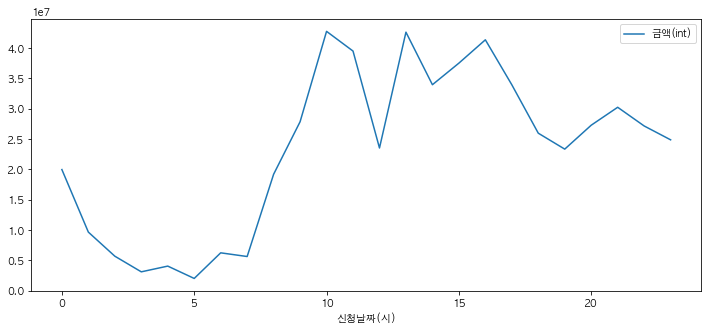

In [32]:
payments.pivot_table(values = '금액(int)', index = '신청날짜(시)',
                    aggfunc = 'sum').plot(figsize = [12, 5])

DS School 수강생들의 대부분이 직장인임을 감안할 때, 일별, 시간별 결제금액을 보고 '직장인들이 주로 근무시간에 결제를 결심한다.' 라는 합리적인 가설을 세울 수 있습니다. 이 가설은 점심시간대인 12시부터 1시 사이에 급격하게 감소하는 것을 통해 더 지지받을 수 있습니다.

이를 바탕으로 콘텐츠 제작자에게 근무시간에 딴 짓을 하는 직장인들을 타겟팅하는 콘텐츠를 제작해달라고 요청할 수 있습니다. 또한, 페이스북이 제공하는 광고 시간 타겟팅 기능을 이용하여 근무시간대에 들어가는 광고예산의 비중을 늘릴 수도 있습니다.


---

**7. 사용자의 니즈를 바탕으로 향후 오픈할 강의의 우선순위를 정하려고 합니다. 설문조사 데이터에서 답변을 정리하겠습니다.**

우선, 각 질문과 답변의 내용은 다음과 같습니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>question_text</th>
      <th>answer1_text</th>
      <th>answer2_text</th>
      <th>answer3_text</th>
      <th>answer4_text</th>
      <th>answer5_text</th>
      <th>answer6_text</th>
      <th>answer7_text</th>
      <th>answer8_text</th>
      <th>answer9_text</th>
      <th>answer10_text</th>
      <th>answer11_text</th>
      <th>answer12_text</th>
    </tr>
    <tr>
      <th>question_id</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>데이터 사이언스를 배우고 싶은 이유는 무엇인가요?</td>
      <td>현재 다니는 직장에서 즉시 활용할만한 데이터 관련 지식을 습득하기 위해</td>
      <td>데이터와 인공지능 관련 석사/박사로 진학하기 위해</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직을 하기 위해</td>
      <td>기술 창업을 위한 원천기술을 습득하기 위해</td>
      <td>최신 데이터사이언스 트렌드에 관심이 있어서</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>2</th>
      <td>이전까지 수학, 통계학, 프로그래밍에 관한 공부를 얼만큼 하셨나요?</td>
      <td>최근 2~3년간 수학, 통계학 공부를 해 본 적이 없으며, 프로그래밍 역시 해 본 ...</td>
      <td>수학과 통계학은 자신 없지만, 프로그래밍은 조금 해 보았다.</td>
      <td>최근까지 수학과 통계학을 공부해왔지만, 프로그래밍은 해 본 적 없다.</td>
      <td>수학과 통계학을 공부하였으며, 프로그래밍도 할 줄 안다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>3</th>
      <td>데이터 사이언스를 어디에 활용하고 싶으신가요? (복수 선택 가능)</td>
      <td>상품, 컨텐츠 추천 엔진을 구현하고 싶다. (ex: 의류, 영화, 음악 추천 등)</td>
      <td>주가를 분석하고 예측할 수 있는 방법을 알고 싶다. (ex: 주가 등락, 비트코인 ...</td>
      <td>부동산 시세와 그 등락을 예측하고 싶다. (ex: 아파트, 점포, 오피스텔 등)</td>
      <td>텍스트 데이터를 적극 활용해보고 싶다. (ex: 스팸 필터링, 검색 엔진, 법률/판...</td>
      <td>이미지 데이터를 다뤄보고 싶다. (ex: 얼굴 인식, 자동차 표시판 분석 등)</td>
      <td>온라인 커머스에서 판매하는 상품의 재구매율을 늘리고 싶다.</td>
      <td>정기 구독 상품의 구독 이탈률(Churn Rate)을 낮출 수 있는 방법을 알고 싶다.</td>
      <td>마케팅 데이터를 분석하여, 온라인 마케팅의 효율을 높이고 싶다.</td>
      <td>해상사고나 범죄를 분석/예측하여 그 비율을 낮추고 싶다.</td>
      <td>의료 데이터나 신약 분석 등에 활용하고 싶다.</td>
      <td>공공데이터를 활용하는데 도움이 되고 싶다.</td>
      <td>기타</td>
    </tr>
    <tr>
      <th>4</th>
      <td>수강을 하면서 과제를 어느정도까지 완수하실 수 있으신가요?</td>
      <td>현재 하는 일이 바빠서, 과제가 주어지면 전혀 할 수가 없다.</td>
      <td>여가시간을 활용하여 무리하지 않는 선에서 어느정도의 과제는 해결할 수 있다.</td>
      <td>다소 시간이 넉넉하기 때문에 많은 과제가 주어진다고 해도 충분히 완수할 수 있다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>5</th>
      <td>DS School의 과정을 마친 후 데이터를 얼만큼 잘 다루고 싶은가요?</td>
      <td>취미로 데이터를 다뤄볼 수 있을 정도면 충분하다.</td>
      <td>대학원 연구실에 가도 뒤쳐지지 않을 만큼 이론과 실전 경험을 쌓고 싶다.</td>
      <td>현재 다니는 회사에서 데이터 관련 업무를 병행할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>풀타임 데이터 사이언티스트로 취업/이직할 수 있을 만큼 실력을 쌓고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>6</th>
      <td>수업은 어느 시간을 선호하시나요? (중복 선택 가능)</td>
      <td>주중 아침</td>
      <td>주중 낮</td>
      <td>주중 저녁</td>
      <td>주말 아침</td>
      <td>주말 낮</td>
      <td>주말 저녁</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>7</th>
      <td>수업을 듣는 기간동안 얼만큼 시간을 할애할 수 있나요?</td>
      <td>현재 하는 일에 지장이 없는 선에서, 파트타임으로 수업을 들을 수 있다.</td>
      <td>현재 하는 일은 쉬는 한이 있더라도, 풀타임으로 수업을 듣고 싶다.</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
      <td>NaN</td>
    </tr>
  </tbody>
</table>

고객들이 데이터 사이언스를 어디에 활용하고 싶은지에 대한 이유를 정리하기 위해서는 1번 3번 질문에 대한 정답을 정리해서 보여주어야 합니다.

In [33]:
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

print(len(answer_list))
answer_list

12


['answer1_selected(bool)',
 'answer2_selected(bool)',
 'answer3_selected(bool)',
 'answer4_selected(bool)',
 'answer5_selected(bool)',
 'answer6_selected(bool)',
 'answer7_selected(bool)',
 'answer8_selected(bool)',
 'answer9_selected(bool)',
 'answer10_selected(bool)',
 'answer11_selected(bool)',
 'answer12_selected(bool)']

In [34]:
#pivot table을 만듭니다. 
table = pd.pivot_table(surveys,
                       index = 'question_id',
                       values = answer_list,
                       aggfunc = pd.np.mean,
                       dropna = False)

table = table[answer_list].loc[[1,3]]
table

/Users/caiyin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """


,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.310329,0.092067,0.231800,0.076162,0.289643,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.352950,0.300847,0.202553,0.349289,0.235928,0.201088,0.1301,0.406675,0.096568,0.163214,0.337257,0.130571



1번 질문에는 1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해) 가 가장 높은 답변을 받았고, 3번 질문에서는 8번 응답 (마케팅 데이터를 분석하여 마케팅의 효율을 높이고 싶다.)가 가장 높은 응답을 받았습니다.

하지만, 최종 목표는 결제 유도이기 때문에, 모든 설문조사를 완료한 사람이 아닌 결제를 완료한 사람들의 결과만을 가지고 분석해야 합니다. 이를 위해 surveys 테이블과 payments 테이블을 병합할 필요가 있습니다.

---

**8. 결제 데이터와 유저 데이터에는 동일한 id (payment_id), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 pandas merge로 하겠습니다.**

In [35]:
# 'user' 테이블의 모든 컬럼을 가져오는 쿼리를 작성 후 read_sql로 불러와주세요.
query = "SELECT * FROM 'users'"

users = pd.read_sql(query, connect)

users.head(5)

#payments와 users가 병합된 테이블에 다시 surveys를 병합합니다. 모든 병합은 inner로 진행합니다.
data = (
    payments.merge(users, left_on = '이메일', right_on='email', how='inner')
#surveys와는 user_id를 기준으로 병합합니다.
                    .merge(surveys, on='user_id', how='inner')
)

data.head()

,payment_id_x,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),금액(int),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일),user_id,mixpanel_id,payment_id_y,email,...,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
0,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,495000,2018,1,31,15,42,20,Wednesday,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,f,None,None,None,None,None,None,None,2018-01-31 06:15:13.343156,2018-01-31 06:15:13.343156,False,True,False,False,False,False,False,False,False,False,False,False
1,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,495000,2018,1,31,15,42,20,Wednesday,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,None,None,None,None,None,None,None,None,2018-01-31 06:15:23.300754,2018-01-31 06:15:23.300754,False,False,False,True,False,False,False,False,False,False,False,False
2,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,495000,2018,1,31,15,42,20,Wednesday,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,f,t,t,f,f,f,f,f,t,f,2018-01-31 06:15:45.486897,2018-01-31 06:15:45.486897,False,False,False,True,True,False,False,False,False,False,True,False
3,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,495000,2018,1,31,15,42,20,Wednesday,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,f,t,None,None,None,None,None,None,None,None,None,2018-01-31 06:15:52.621368,2018-01-31 06:15:52.621368,False,False,True,False,False,False,False,False,False,False,False,False
4,aiym79ous7l8,고세준,0usbs4knns0s@dsschool.co.kr,01056007186,2018-01-31 15:42:20,입문반 22기,"495,000",카드결제,결제 완료,010-5600-7186,입문반,22기,True,495000,2018,1,31,15,42,20,Wednesday,drdi7xmsj0nm,NPAFFXASZPACSNMVVRGCKPBKPZQDCKMUUCTCAFRJXFWGGL...,None,0usbs4knns0s@dsschool.co.kr,...,t,f,f,None,None,None,None,None,None,None,None,2018-01-31 06:16:00.043586,2018-01-31 06:16:00.043586,False,True,False,False,False,False,False,False,False,False,False,False


---

**9. 결제 데이터와 유저 데이터에는 동일한 id (e-mail), 유저 데이터와 설문조사 데이터에는 동일한 id (user_id)가 존재합니다. 각자 가져와서 SQL join으로 합칩니다.**

In [36]:
#SQL Join 
#payments 데이터와 users 데이터 연결 payment_id
#surveys 데이터 연결 user_id

query = """
    SELECT * 
    FROM 'payments'
    INNER JOIN 'users'
    ON 'payments'.이메일 = 'users'.email
    INNER JOIN 'surveys'
    ON 'users'.user_id = 'surveys'.user_id
    """

connect_merged_sql = pd.read_sql(query, connect)

print(connect_merged_sql.shape)
connect_merged_sql.head(3)

(3884, 30)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,user_id,mixpanel_id,payment_id,email,survey_id,user_id,question_id,answer1_selected,answer2_selected,answer3_selected,answer4_selected,answer5_selected,answer6_selected,answer7_selected,answer8_selected,answer9_selected,answer10_selected,answer11_selected,answer12_selected,created_at,updated_at
0,5vtq11wow61w,한서훈,3xy4zzr6k13x@dsschool.co.kr,01040513577,2018-01-03 14:44:12,입문반 19기,"495,000",카드결제,결제 완료,orqcrchp0s2a,OJRXJURAXLJMMAWURTWSNBUJIRJJIVSHDHBBBPORBVRPPQ...,None,3xy4zzr6k13x@dsschool.co.kr,dt9gwdq9od02,orqcrchp0s2a,6,f,f,f,t,f,f,None,None,None,None,None,None,2018-01-03 05:42:02.303657,2018-01-03 05:42:02.303657
1,209h7wqy7bdf,김재호,ao6kez00wxnh@dsschool.co.kr,010-6880-0251,2017-10-22 08:53:29,입문반 11기,"495,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152
2,uh701zm4irgx,김재호,ao6kez00wxnh@dsschool.co.kr,010-7202-2433,2017-12-21 16:47:00,딥러닝 2기,"1,043,000",카드결제,결제 완료,54ojyvp8ergj,REPODOLMGTJDYQVHMHOSDVDCLCXWQSKSJMUGCMXTTJBZSP...,None,ao6kez00wxnh@dsschool.co.kr,51yza3u3obtk,54ojyvp8ergj,6,f,f,t,t,t,t,None,None,None,None,None,None,2018-01-06 08:47:19.325152,2018-01-06 08:47:19.325152


---

**10. 8번에서 merging한 데이터 중 필요한 컬럼만 추립니다. 그리고 데이터를 클리닝하겠습니다.**

모든 테이블을 병합한 상태이기 때문에 데이터의 컬럼이 과도하게 많은 상태입니다. 

In [39]:
# 분석에 필요한 컬럼들의 리스트입니다.
selected_columns = ['user_id',  '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜', '상태(bool)', 'mixpanel_id']

selected_columns += [
    'question_id',
    'answer1_selected(bool)', 'answer2_selected(bool)', 'answer3_selected(bool)',
    'answer4_selected(bool)', 'answer5_selected(bool)', 'answer6_selected(bool)',
    'answer7_selected(bool)', 'answer8_selected(bool)', 'answer9_selected(bool)',
    'answer10_selected(bool)', 'answer11_selected(bool)', 'answer12_selected(bool)'
]

selected_columns += [
    'created_at', 'updated_at'
]


#위의 리스트를 이용하여 데이터에 필요한 컬럼만 남겨주세요.

#Write your code here!

data = data[selected_columns]
data.head(3)
print(data.columns)

Index(['user_id', '이름', '연락처(clean)', '이메일', '신청수업', '금액(int)', '결제방법', '신청날짜',
       '상태(bool)', 'mixpanel_id', 'question_id', 'answer1_selected(bool)',
       'answer2_selected(bool)', 'answer3_selected(bool)',
       'answer4_selected(bool)', 'answer5_selected(bool)',
       'answer6_selected(bool)', 'answer7_selected(bool)',
       'answer8_selected(bool)', 'answer9_selected(bool)',
       'answer10_selected(bool)', 'answer11_selected(bool)',
       'answer12_selected(bool)', 'created_at', 'updated_at'],
      dtype='object')


사용하고 있는 데이터는 payments_complete와 surveys를 병합한 데이터로 전부 결제를 완료한 사람들의 설문조사 데이터입니다. 하지만, 결제를 한 이후에도 설문조사를 하신 경우 있고 한 사람이 여러번 설문조사를 한 경우가 있는데 결제를 한 이후에도 설문조사를 한 경우는 삭제하고 여러번 설문조사를 한 경우는 첫번째 설문 조사만 남기고 중복정보도 제거해주어야 합니다.


In [29]:
#먼저 신청날짜와 created_at 컬럼을 이용하여 결제를 한 이후에도 설문조사를 한 경우는 삭제하여 주세요.
data = data[data["신청날짜"] >= data["created_at"] ]

In [42]:
#단 중복제거하기 전에 "이메일", "question_id", "created_at" 컬럼을 기준으로 sorting 해야 합니다.
data = data.sort_values( by = ["이메일", "question_id", "created_at"])

#또한, 이메일과 신청수업, question_id 3개가 중복되는 경우는 drop_duplicates()를 이용해 최신의 정보만 남겨주세요. 
#중복을 제거하고 남길 데이터를 선택하는 방법은 keep 옵션을 활용하면 됩니다. 
data = data.drop_duplicates(["이메일", "question_id", "created_at"], keep = 'last')

data.head()

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at
1387,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:19.286692,2018-01-17 06:31:19.286692
1388,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526
1389,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112
1390,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999
1391,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555


---

**11. 위에서 정리한 결과를 바탕으로 결제를 한 사람들의 설문조사 1,3번 응답결과를 정리하겠습니다.**

In [43]:
#리스트 안에 for 문을 넣을 수 있습니다.
answer_list = [f"answer{i}_selected(bool)" for i in range(1, 13)]

#우선 결제를 완료한 사람들의 데이터 테이블을 이용하여 피벗테이블을 만들어주세요.
table_purchased = pd.pivot_table(data, index = 'question_id', 
                                values = answer_list,
                                aggfunc = 'mean',
                                margins = False,
                                dropna = True,
                                fill_value = 0)

table_purchased = table_purchased[answer_list].loc[[1,3]]

table_purchased

,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool)
question_id,,,,,,,,,,,,
1,0.295775,0.105634,0.286385,0.093897,0.21831,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.408213,0.398551,0.277778,0.403382,0.26570,0.2343,0.200483,0.355072,0.10628,0.178744,0.297101,0.135266


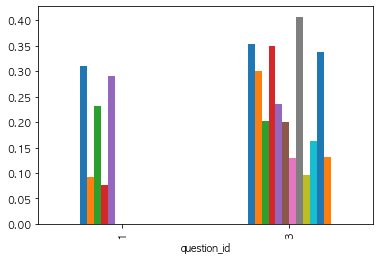

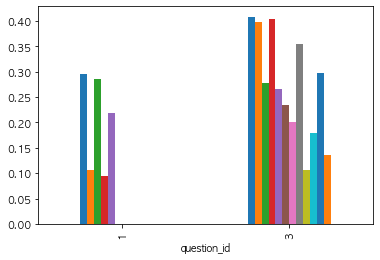

In [45]:
# 그래프 기본 셋업
%matplotlib inline
import matplotlib.pyplot as plt

# 적절한 그래프의 종류를 설정하는 것이 중요합니다. kind와 legend 옵션만을 이용했을 때, 다음과 같은 결과가 나옵니다.
table.plot(kind='bar', legend=False)
table_purchased.plot(kind='bar', legend=False)

모든 설문조사 결과와 결제한 사람들의 설문조사 결과는 상당히 비슷한 양상을 보입니다. 그런데, 1번 질문의 5번 응답 '최신 데이터사이언스 트렌드에 관심이 있어서' 응답을 한 경우는 결제율이 낮다는 것을 알 수 있습니다. 

아무래도 고가의 강의이다 보니, 관심만 있는 정도로는 구매로의 전환이 쉽게 일어나지 않습니다.
1번 응답 (현재 다니는 직장에서 데이터 사이언스를 활용하기 위해)의 비율이 압도적으로 높고, 두 번째는 전업 데이터 사이언티스트로 이직/전직하기 입니다. 

모든 사람을 대상 설문조사 결과와 결제자 대상 설문조사 결과를 3번 질문에서도 비교해 봤을 때, 응답 8번 또한 눈에 띄게 줄어든 것을 확인할 수 있습니다. 8번의 응답은 '마케팅 데이터를 분석하여 마케팅의 효율을 높이기' 입니다. 이를 바탕으로 마케팅에 관심이 있는 사람들은 데이터 마케팅 강의로 이탈하거나 사이언스 강의를 수강하지 않는다고 생각할 수 있습니다. 

현재 설문조사 결과를 종합해봤을 떄, 직장에서 업무에 데이터 사이언스를 활용하면서 '추천 시스템'을 만들거나 텍스트 데이터를 다루는 것에 대한 수요가 매우 높음을 확인할 수 있습니다.


---

**12. created_at은 세션이 생성된 시간이고 '신청날짜'는 실제로 수업을 신청한 시간입니다. DS School 홈페이지에 처음 접근한 순간부터 결제까지 걸린 시간을 계산해보겠습니다. 단, 신청날짜가 created_at보다 작은(먼저인) 경우는 제외합니다**

대부분의 사용자가 DS School 홈페이지에 접속하자마자 결제를 하는 것이 아닌, 충분한 고민 후에 결제를 진행합니다. 사람들이 결제를 하는데까지 고민하는 시간을 잘 정리한다면 마케팅 부서에서 리타게팅 전략을 펼칠 때 소중한 자료로 활용할 수 있을 것입니다.

In [47]:
#time.dt.components 를 이용하면 해당 시간의 정보를 DataFrame으로 만들어줍니다.
time.dt.components.head(2)

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
1387,0,9,14,35,713,308,0
1388,0,9,14,16,752,474,0


In [48]:
#신청날짜가 created_at 이후에 발생한 데이터만 선별합니다.
selected_data = data[data["신청날짜"] >= data["created_at"]]

#이메일, question_id, created_at 에서 중복이 있으면 삭제해줍니다. 
selected_data = selected_data.drop_duplicates(["이메일", "question_id", "created_at"], keep = 'last')

selected_data["time"] = selected_data["신청날짜"] - selected_data["created_at"]
selected_data.head()

,user_id,이름,연락처(clean),이메일,신청수업,금액(int),결제방법,신청날짜,상태(bool),mixpanel_id,question_id,answer1_selected(bool),answer2_selected(bool),answer3_selected(bool),answer4_selected(bool),answer5_selected(bool),answer6_selected(bool),answer7_selected(bool),answer8_selected(bool),answer9_selected(bool),answer10_selected(bool),answer11_selected(bool),answer12_selected(bool),created_at,updated_at,time
1387,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:19.286692,2018-01-17 06:31:19.286692,09:14:35.713308
1388,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,1,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:38.247526,2018-01-17 06:31:38.247526,09:14:16.752474
1389,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,2,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:42.281112,2018-01-17 06:31:42.281112,09:14:12.718888
1390,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,3,True,False,False,True,False,True,False,False,False,False,False,False,2018-01-17 06:31:55.697999,2018-01-17 06:31:55.697999,09:13:59.302001
1391,nkl4k2dfd2x6,강성우,010-5750-3618,08opbi2nzm6x@dsschool.co.kr,마케팅 3기,735000,카드결제,2018-01-17 15:45:55,True,YLURVGLCDNUVKGXDIJGFMPBCBVWXQZCRMIRZYGFQBQGSGO...,4,True,False,False,False,False,False,False,False,False,False,False,False,2018-01-17 06:31:59.842555,2018-01-17 06:31:59.842555,09:13:55.157445


In [50]:
time_int = \
time.dt.components['days'] + time.dt.components['hours'] / 24 + time.dt.components['minutes'] / (24*60) + time.dt.components['seconds'] / (24 * 60 * 60)

time_int.head()

1387    0.385127
1388    0.384907
1389    0.384861
1390    0.384711
1391    0.384664
dtype: float64

위에서 만든 데이터를 시각화를 통해 정리하려고 합니다. 우리가 얻고 싶은 결과는 a%의 고객은 세션 생성후 b일 안에 결제한다. 라는 함수를 만들어내는 것입니다. 

In [51]:
#그래프를 그리기 위한 library를 불러옵니다.
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# seaborn의 경우 테마설정을 다음과 같이 할 수 있습니다. 사전 구성된 테마는 다음과 같습니다. {darkgrid, whitegrid, dark, white, ticks}
sns.set_style("whitegrid", {'grid.linestyle': '--'})

(0, 30)

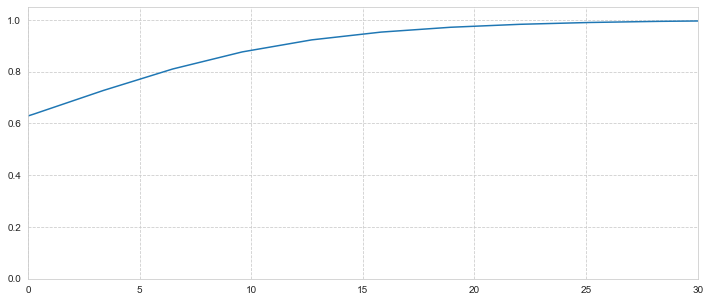

In [53]:
#distplot 
plt.figure(figsize = [12,5])
ax = sns.distplot(time_int,
                 hist = False,
                 #hist_kws = dict(cumulative=True),
                 kde_kws = {'cumulative' : True})

ax.set_xlim(0,30)

위의 분포를 통해 결제를 한 사람들 중 80% 이상이 10일 이내 결제, 그리고 나머지 20%는 훨씬 많은 고민을 한다는 것을 파악할 수 있습니다. 이를 통해 DS School에 관심을 가졌지만 아직 결제를 하지 않은 잠재고객들의 결제 가능성을 역으로 추정해 리타겟팅 전략의 예산 분배를 진행할 수 있습니다. 

---

**14. 믹스패널 데이터를 불러옵니다. 그리고 이를 users와 payments 테이블과 병합합니다.** 

이번엔 마케팅 캠페인별 효율을 믹스패널 데이터를 이용해 비교분석하려고 합니다. 

In [57]:
# mixpanel 데이터를 불러옵니다.

mixpanel_data = pd.read_csv("/Users/caiyin/Desktop/dsschool/mixpanel_people_profiles_revised.csv")

print(mixpanel_data.shape)
mixpanel_data.head()

(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id
0,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-16T22:00:21,iOS,Facebook Mobile,Seoul,KR,VGGPBLBXCDGZOSCVCODTNZBICKURLVAFKASUMZCNZQHEIU...
1,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-19T19:03:36,iOS,Mobile Safari,Incheon,KR,TIKFTLTMQQLYMKSDPCFCPNSOLHKLOQWQMIMKXBRUPVKEOD...
2,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-21T23:34:02,Windows,Firefox,Seoul,KR,WMFONVUFEIFDJOOZWJHPMTRKPDMKHPDBQSYKYTACHVODOL...
3,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T07:43:58,iOS,Facebook Mobile,Seoul,KR,DYXLHORZUNPSZSEXOIRNGCZWMEHHNKCTACJOFEEWEAFYVX...
4,NaN,NaN,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-06-26T15:03:48,Android,Chrome,Seoul,KR,BRQEHDPQRESBAIAURZIPTHTPDMJZSBBNACVCNMQFGXVXIP...


In [58]:
mixpanel_payments = (
    mixpanel_data.merge(users, how='inner', left_on='distinct_id', right_on='mixpanel_id')
                 .merge(payments, how='left', on='payment_id')
)    
print(mixpanel_payments.shape)
print(mixpanel_data.shape)

mixpanel_payments.head()

(13875, 44)
(17902, 20)


,class_name,created_at,initial_referring_domain,utm_campaign [first touch],utm_campaign [last touch],utm_content [first touch],utm_content [last touch],utm_medium [first touch],utm_medium [last touch],utm_source [first touch],utm_source [last touch],utm_term [first touch],utm_term [last touch],initial_referrer,last_seen,os,browser,city,country_code,distinct_id,user_id,mixpanel_id,payment_id,email,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),금액(int),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
0,NaN,2017-09-01T09:27:57,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-01T09:30:07,Android,Chrome,Seoul,KR,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,j81umpsxbqer,DEDFPJKWKNGOKXACEKRZQZUXDPBCJYHQKHWPBSQMCJCJUC...,None,xgyd2m7cz1tz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2017-09-25T11:08:25,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-09-25T11:08:33,Windows,Chrome,Seoul,KR,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,gc3riqbpec5a,JENBBLWHSHUABKXPQBCOQJFNMRZAUAKECJEKVIUHQRWHET...,None,ww4rloe4l6to@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2017-11-27T16:59:25,dsschool.pagedemo.co,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://dsschool.pagedemo.co/,2017-11-27T16:59:36,iOS,Facebook Mobile,Seoul,KR,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,h47v07u6u5zm,DGJIUGOFHLKOAFHAABHBGGRWGXJRWGYUAQXGLFNIWAXJVG...,None,i97zkjstv1mz@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2017-11-30T15:44:16,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2017-11-30T15:44:27,Windows,Internet Explorer,Suwon-si,KR,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,v6ln67rwsqo4,AOPLSNBPLOMLIMRAFVFZDBGSKZYKATBOTFRQVECUAKWEPT...,86dpwpocr5gi,w2gcxxhaam4s@dsschool.co.kr,이초현,g8zyxqrdgcgf@dsschool.co.kr,01088615300,2017-12-17 09:26:56,중급반 4기,"594,000",카드결제,결제 완료,010-8861-5300,중급반,4기,True,594000.0,2017.0,12.0,17.0,9.0,26.0,56.0,Sunday
4,NaN,2018-01-01T16:03:02,$direct,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$direct,2018-01-01T16:03:09,Windows,Chrome,Seoul,KR,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,mbwhfxfmmowu,MKYQTIHFMYVVIYKHXYLVMNDVMBNLLMHULEPWWVYTVMLLLS...,None,rnippqcfcr09@dsschool.co.kr,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **14. 위에서 정리한 믹스패널 데이터를 바탕으로 캠페인별 유입 id의 수에 비해 결제 비율이 가장 높은 광고 캠페인을 찾습니다.**

직접 접속한 고객들도 있고, 개인정보 보호 브라우저 등을 사용하는 고객들로 인해 항상 유입 경로를 추적하는게 가능하지는 않습니다.

`utm_campaign [first touch]`의 경우 해당 고객이 '처음'으로 유입된 캠페인이 무엇인지에 대한 정보입니다. 해당 컬럼이 비어있지 않은 데이터만 남기고, 피벗 테이블을 이용해 `utm_campaign [first touch]`별 실제 결제 비율을 구하겠습니다.

In [63]:
#notnull 인 데이터 데이터만 선별하겠습니다. 
mixpanel_payments = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].notnull()]

In [81]:
# 피벗 테이블을 이용해 utm_campaign [first touch]별 실제 결제 비율을 구해주세요.
table = pd.pivot_table(mixpanel_payments, index = "utm_campaign [first touch]", 
               values = "상태(bool)", 
               aggfunc = lambda x: (x == True).sum())

#mixpanel_payments["상태(bool)"] = mixpanel_payments.apply(lambda x: x/x.sum(), axis = 0)

table["상태(bool)_ratio"] = table["상태(bool)"] / table["상태(bool)"].sum()

#실제 결제 비율이 높은 campaign 별로 상위 5개만 출력합니다.
table.sort_values(by = "상태(bool)_ratio", ascending = False).head()

,상태(bool),상태(bool)_ratio
utm_campaign [first touch],,
$none,26,0.279570
deeplearningtraffic,14,0.150538
soldout,7,0.075269
byung,5,0.053763
ryoovideo,5,0.053763


In [82]:
campaign = mixpanel_payments['utm_campaign [first touch]'].value_counts()

In [83]:
over20_campaign = campaign[campaign > 20]
over20_campaign.head()

$none                  2166
soldout                 643
deeplearningtraffic     632
problem                 327
ryoovideo               264
Name: utm_campaign [first touch], dtype: int64

head와 tail을 보면 극단적으로 많거나 (33%) 0%인 것을 확인할 수 있습니다. 이는 적은 예산을 쓴 캠페인은 해당 캠페인으로 부터 유입된 고객 자체가 적기 때문에 결과가 극단적으로 나오는 것입니다.

따라서, 유입 고객의 수가 20명 이상인 캠페인에 대해서만 위의 분석을 진행하기로 합니다.

In [84]:
over20_data = mixpanel_payments[mixpanel_payments['utm_campaign [first touch]'].isin(over20_campaign.index)]

In [87]:

table = pd.pivot_table(over20_data, values='상태(bool)',
               index='utm_campaign [first touch]', 
               aggfunc = lambda x: (x == True).sum()).sort_values('상태(bool)',
                                           ascending=False).head(10)


table["상태(bool)_ratio"] = table["상태(bool)"] / table["상태(bool)"].sum()

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>상태(bool)</th>
    </tr>
    <tr>
      <th>utm_campaign [first touch]</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>dripinsta7</th>
      <td>0.066667</td>
    </tr>
    <tr>
      <th>startup</th>
      <td>0.054054</td>
    </tr>
    <tr>
      <th>leveltest</th>
      <td>0.041667</td>
    </tr>
    <tr>
      <th>search2</th>
      <td>0.040000</td>
    </tr>
    <tr>
      <th>purchase_complete</th>
      <td>0.035714</td>
    </tr>
    <tr>
      <th>fbpage</th>
      <td>0.030303</td>
    </tr>
    <tr>
      <th>univmajor</th>
      <td>0.028037</td>
    </tr>
    <tr>
      <th>sungwon</th>
      <td>0.026316</td>
    </tr>
    <tr>
      <th>Clab</th>
      <td>0.024390</td>
    </tr>
    <tr>
      <th>deeplearningtraffic</th>
      <td>0.022152</td>
    </tr>
  </tbody>
</table>

상위권의 캠페인들은 유입된 고객대비 결제율이 다른 캠페인에 비해 상당히 높은 것을 파악할 수 있습니다. 결제가 마케팅의 최종 목표이기 때문에, 마케팅팀에 해당 캠페인의 리스트를 전달해주어 해당 캠페인의 컨텐츠 내용을 분석한 뒤 가설을 세워 더 효율이 좋은 캠페인을 만들 수 있습니다.

---

**15. 결제 데이터를 바탕으로 두 개 이상의 강의를 수강한 고객들을 찾겠습니다.**

DS School 강의에 만족도가 높은 고객분들은 여러개의 강의를 수강하고 가십니다. 이런 분들은 향후 오픈되는 강의도 수강하실 확률이 높기 때문에 VIP로 선정하여 DS School의 소식을 가장 최우선으로 전하고자 합니다. payments 테이블을 이용하여 이러한 고객분들을 찾아내어 구매 강좌수를 포함하여 데이터프레임으로 만들어주세요. 고객의 id는 이메일을 사용하겠습니다.

In [88]:
# 상태(bool) 은 True인 값만 선택합니다
payments_complete = payments[payments["상태(bool)"] == True]

#신청날짜에 맞게 정렬합니다
payments_complete = payments_complete.sort_values('신청날짜')
# 중복의 경우는 최신 것만 살리고 나머지는 지웁니다
payments_complete = payments_complete.drop_duplicates(['이름','이메일','신청수업'], keep = 'last')

# email 수가 1개 이상인 경우만을 반영하는 payments_email_counts 
payments_email_counts = payments_complete["이메일"].value_counts()
payments_email_counts = payments_email_counts[payments_email_counts > 1]


# 1개 이상인 경우만을 원 데이터에 반영 isin
payments_complete = payments_complete[payments_complete["이메일"].isin(payments_email_counts.index)]
payments_complete = payments_complete.sort_values(by = ['이름','이메일','신청수업'])

print(payments_complete.shape)
payments_complete.head()

(320, 21)


,payment_id,이름,이메일,연락처,신청날짜,신청수업,금액,결제방법,상태,연락처(clean),수업타입,기수,상태(bool),금액(int),신청날짜(연),신청날짜(월),신청날짜(일),신청날짜(시),신청날짜(분),신청날짜(초),신청날짜(요일)
208,di32b3c6b9gn,강서진,w9df010ys6yd@dsschool.co.kr,010-5450-6814,2017-12-28 17:54:17,딥러닝 2기,"1,043,000",카드결제,결제 완료,010-5450-6814,딥러닝,2기,True,1043000,2017,12,28,17,54,17,Thursday
572,opszgo4rdggk,강서진,w9df010ys6yd@dsschool.co.kr,010-6775-1500,2017-10-18 11:23:25,입문반 11기,"495,000",카드결제,결제 완료,010-6775-1500,입문반,11기,True,495000,2017,10,18,11,23,25,Wednesday
362,fim5rxkhv9ba,강서진,w9df010ys6yd@dsschool.co.kr,010-8055-5565,2017-11-22 08:07:11,중급반 4기,"594,000",카드결제,결제 완료,010-8055-5565,중급반,4기,True,594000,2017,11,22,8,7,11,Wednesday
456,dziqvrn49knl,강선영,1n04ko1pgq3r@dsschool.co.kr,010-4714-5480,2017-11-04 17:50:57,딥러닝 1기,"1,043,000",카드결제,결제 완료,010-4714-5480,딥러닝,1기,True,1043000,2017,11,4,17,50,57,Saturday
675,k8wd2krz3qcg,강선영,1n04ko1pgq3r@dsschool.co.kr,010-1746-0407,2017-09-13 22:56:56,입문반 9기,"495,000",카드결제,결제 완료,010-1746-0407,입문반,9기,True,495000,2017,9,13,22,56,56,Wednesday


In [93]:
# 이메일 별로 구매한 강좌수를 세는 행을 만듭니다.
num_bought = payments_complete.loc[payments_complete.duplicated(subset=['이름', '이메일'], keep=False), '이메일'].value_counts()\
.to_frame(name='구매 강좌수')

# 조회
print(num_bought.shape)
num_bought.head(5)


(149, 1)


,구매 강좌수
1n04ko1pgq3r@dsschool.co.kr,4
ewgzngg51eyr@dsschool.co.kr,3
uzzsngp7nk7z@dsschool.co.kr,3
u6rxonoxuow4@dsschool.co.kr,3
18vwfdfclejc@dsschool.co.kr,3
